# Final Project - Machine Learning 2024/25

### Preprocessing the data 

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [30]:
# read data 
data = pd.read_csv("data/CVD_cleaned.csv")


In [31]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


Heart_Disease
No     0.91915
Yes    0.08085
Name: proportion, dtype: float64


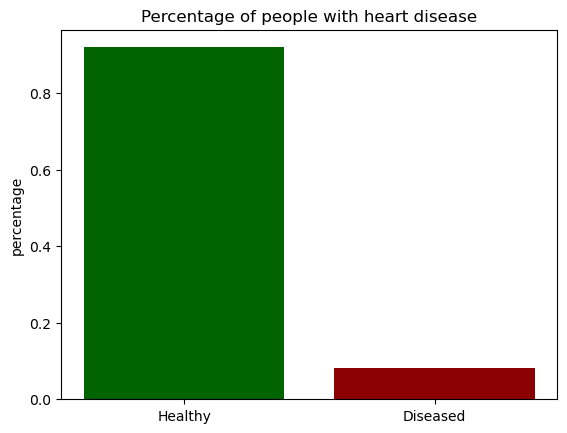

In [17]:
print(data["Heart_Disease"].value_counts(normalize = True))
healthy, diseased = data["Heart_Disease"].value_counts(normalize = True)
fig, ax = plt.subplots()
ax.bar(["Healthy", "Diseased"], [healthy, diseased], color = ["darkgreen", "darkred"])
ax.set_ylabel("percentage")
ax.set_title("Percentage of people with heart disease")
plt.show()


Checkup
Within the past year       0.775030
Within the past 2 years    0.120487
Within the past 5 years    0.056473
5 or more years ago        0.043454
Never                      0.004556
Name: proportion, dtype: float64


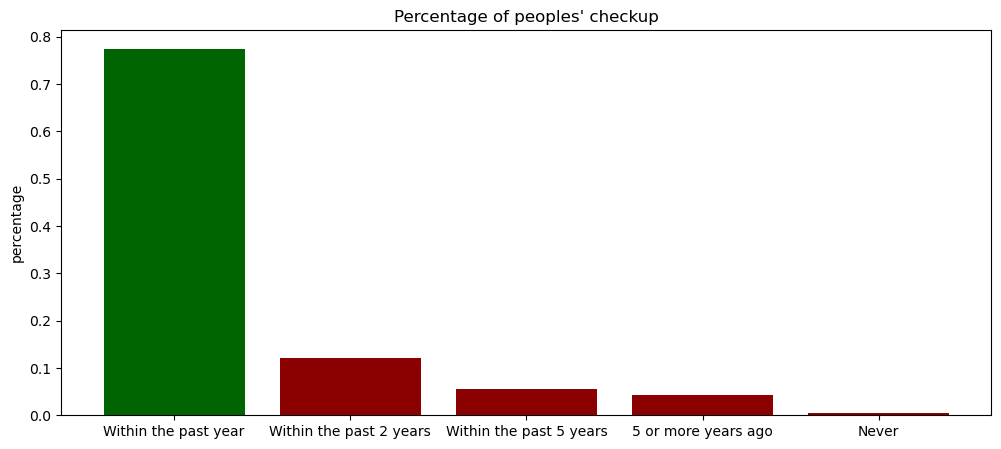

In [32]:
print(data["Checkup"].value_counts(normalize = True))
one, two, three, four, five = data["Checkup"].value_counts(normalize = True)
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(["Within the past year", "Within the past 2 years", "Within the past 5 years", "5 or more years ago", "Never"], [one, two, three, four, five], color = ["darkgreen", "darkred", "darkred", "darkred", "darkred"])
ax.set_ylabel("percentage")
ax.set_title("Percentage of peoples' checkup")
plt.show()

In [25]:
print(data["Age_Category"].value_counts())
one, two, three, four, five = data["Age_Category"].value_counts(normalize = True)
fig, ax = plt.subplots(figsize = (12,5))
ax.bar(["Within the past year", "Within the past 2 years", "Within the past 5 years", "5 or more years ago", "Never"], [one, two, three, four, five], color = ["darkgreen", "darkred", "darkred", "darkred", "darkred"])
ax.set_ylabel("percentage")
ax.set_title("Percentage of peoples' checkup")
plt.show()

Age_Category
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: count, dtype: int64


ValueError: too many values to unpack (expected 5)

In [ ]:
cleaned_data.groupby("Heart_Disease").

In [ ]:
data[['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History']].value_counts()

General_Health  Checkup                
Very Good       Within the past year       84450
Good            Within the past year       75549
Excellent       Within the past year       39513
Fair            Within the past year       29978
Very Good       Within the past 2 years    14333
Good            Within the past 2 years    10616
Poor            Within the past year        9881
Excellent       Within the past 2 years     8394
Very Good       Within the past 5 years     6578
Good            Within the past 5 years     5000
Very Good       5 or more years ago         4635
Excellent       Within the past 5 years     4139
Good            5 or more years ago         3798
Excellent       5 or more years ago         3521
Fair            Within the past 2 years     3082
                Within the past 5 years     1401
                5 or more years ago         1185
Poor            Within the past 2 years      788
Good            Never                        401
Very Good       Never        

In [33]:
# clean data 
cleaned_data = data.copy()
yes_no_categories = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History'] #convert yes/no categories to integers
for i in yes_no_categories:
    cleaned_data[i] = np.where(data[i].str.startswith('Yes', na=False), 1, data[i])
    cleaned_data[i] = np.where(data[i].str.startswith('No', na=False), 0, cleaned_data[i])
    cleaned_data[i] = cleaned_data[i].astype(int)
#cleaned_data
cleaned_data['Sex'].unique() # convert sex to binary integers
cleaned_data['Sex'] = np.where(data['Sex'] == 'Male', 0, 1)
cleaned_data['Sex'] == cleaned_data['Sex'].astype(int)

#age_categories = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','80+']

cleaned_data['Age_Category'].unique() # convert age categories to their mean values
cleaned_data['Age_Category'] = np.where(data['Age_Category'] == '18-24', 21, data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '25-29', 27, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '30-34', 32, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '35-39', 37, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '40-44', 42, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '45-49', 47, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '50-54', 52, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '55-59', 57, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '60-64', 62, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '65-69', 67, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '70-74', 72, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '75-79', 77, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = np.where(cleaned_data['Age_Category'] == '80+', 82, cleaned_data['Age_Category'])
cleaned_data['Age_Category'] = cleaned_data['Age_Category'].astype(int)

cleaned_data['General_Health'].unique() # discretize general health
cleaned_data['General_Health'] = np.where(data['General_Health'] == 'Poor', 1, data['General_Health'])
cleaned_data['General_Health'] = np.where(cleaned_data['General_Health'] == 'Fair', 2, cleaned_data['General_Health'])
cleaned_data['General_Health'] = np.where(cleaned_data['General_Health'] == 'Good', 3, cleaned_data['General_Health'])
cleaned_data['General_Health'] = np.where(cleaned_data['General_Health'] == 'Very Good', 4, cleaned_data['General_Health'])
cleaned_data['General_Health'] = np.where(cleaned_data['General_Health'] == 'Excellent', 5, cleaned_data['General_Health'])
cleaned_data['General_Health'] = cleaned_data['General_Health'].astype(int)

# discretize checkup category
cleaned_data['Checkup'].unique()
cleaned_data['Checkup'] = np.where(data['Checkup'] == 'Never', 1, data['Checkup'])
cleaned_data['Checkup'] = np.where(data['Checkup'] == '5 or more years ago', 2, cleaned_data['Checkup'])
cleaned_data['Checkup'] = np.where(data['Checkup'] == 'Within the past 5 years', 3, cleaned_data['Checkup'])
cleaned_data['Checkup'] = np.where(data['Checkup'] == 'Within the past 2 years', 4, cleaned_data['Checkup'])
cleaned_data['Checkup'] = np.where(data['Checkup'] == 'Within the past year', 5, cleaned_data['Checkup'])
cleaned_data['Checkup'] = cleaned_data['Checkup'].astype(int)

#cleaned_data.dtypes
#cleaned_data


In [35]:
print(cleaned_data["Age_Category"].value_counts())


Age_Category
67    33434
62    32418
72    31103
57    28054
52    25097
82    22271
42    21595
47    20968
77    20705
37    20606
21    18681
32    18428
27    15494
Name: count, dtype: int64


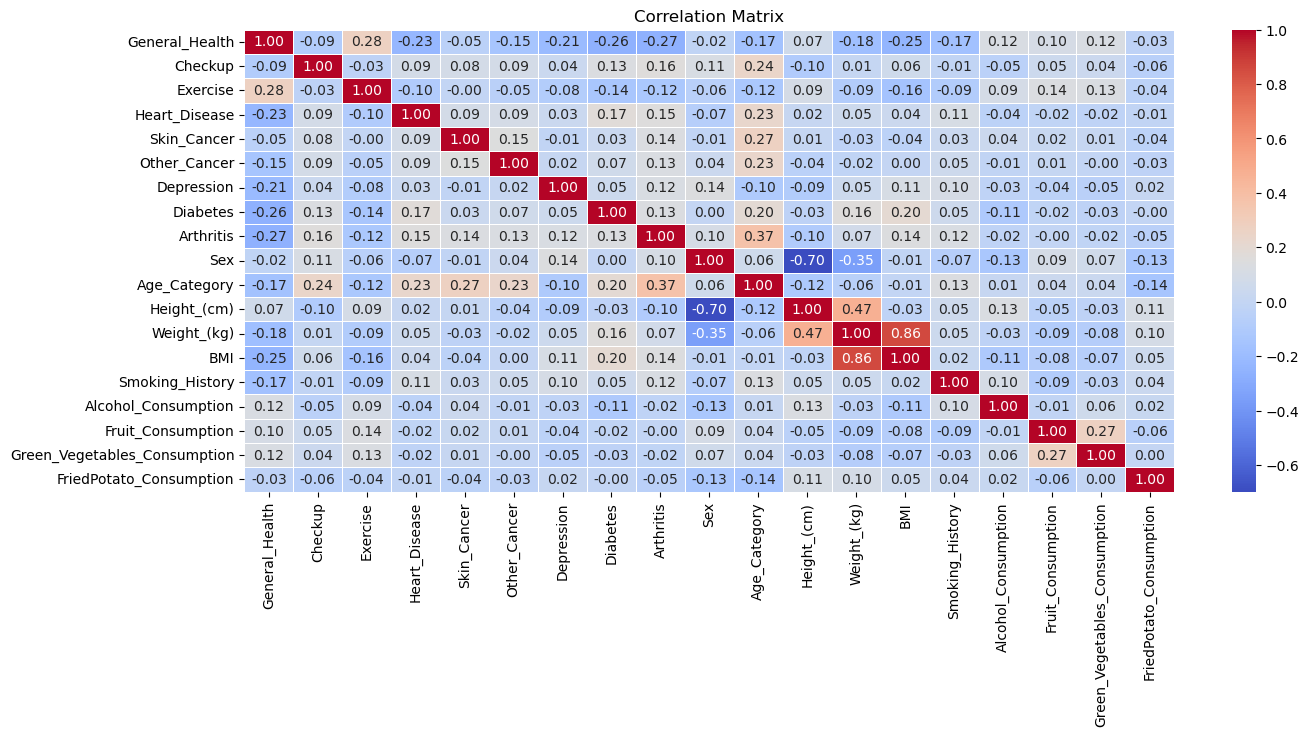

In [36]:
# show correlation matric
correlation_matrix = cleaned_data.corr()
plt.figure(figsize=(15, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# What do we see?

In general the different features do not correlate badly with each other, with some exceptions:
- Sex and height as well as sex and weight naturally correlate quite highly.
- Weight, height and the BMI of a person have a really high correlation. This is logical, since in the formula that determines the BMI, weight and height are both used.
- Exercise correlates with general health (probably they even are causes of the other, could work in both directions)
- fruit and vegetable consumption correlate positively (probably both influenced by a third variable "healthy diet")

Overall, all of the correlations between features are in line with common sense. We will keep the correlations and their possible consequences in mind for our anaylses.


### Summary statistics


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,3.530448,4.617981,0.775062,0.080850,0.097114,0.096738,0.200422,0.138632,0.327245,0.518679,81.664809,170.615249,83.588655,28.626211,0.405577,5.096366,29.835200,15.110441,6.296616
std,1.031224,0.815120,0.417542,0.272606,0.296113,0.295602,0.400316,0.345563,0.469208,0.499652,1.250442,10.658026,21.343210,6.522323,0.491004,8.199763,24.875735,14.926238,8.582954
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.000000,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.000000,163.000000,68.040000,24.210000,0.000000,0.000000,12.000000,4.000000,2.000000
50%,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,82.000000,170.000000,81.650000,27.440000,0.000000,1.000000,30.000000,12.000000,4.000000
75%,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,82.000000,178.000000,95.250000,31.850000,1.000000,6.000000,30.000000,20.000000,8.000000
max,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,82.000000,241.000000,293.020000,99.330000,1.000000,30.000000,120.000000,128.000000,128.000000


### Group and summarise data

In [37]:
summariesGrouped = cleaned_data.groupby("Heart_Disease").agg(["mean", "std"])
summariesGrouped

General_Health             Checkup            Exercise  \
                        mean       std      mean       std      mean   
Heart_Disease                                                          
0                   3.601558  0.996921  4.597288  0.832800  0.786993   
1                   2.722038  1.069279  4.853230  0.522505  0.639422   

                        Skin_Cancer           Other_Cancer            ...  \
                    std        mean       std         mean       std  ...   
Heart_Disease                                                         ...   
0              0.409433    0.089135  0.284939     0.088639  0.284222  ...   
1              0.480178    0.187818  0.390574     0.188819  0.391373  ...   

              Smoking_History           Alcohol_Consumption            \
                         mean       std                mean       std   
Heart_Disease                                                           
0                    0.389879  0.487723            5.185298  8.198700   
1                    0.584037  0.492897            4.085339  8.143996   

              Fruit_Consumption            Green_Vegetables_Consumption  \
                           mean        std                         mean   
Heart_Disease                                                             
0                     29.983159  24.908340                    15.216878   
1                     28.153138  24.439608                    13.900404   

                         FriedPotato_Consumption            
                     std                    mean       std  
Heart_Disease                                               
0              15.003458                6.320104  8.589234  
1              13.961847                6.029594  8.506845  

[2 rows x 36 columns]

In [38]:
# scale data for comparability
checkData = cleaned_data.copy()
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(checkData.drop(columns=["Heart_Disease"])), 
                           columns=checkData.drop(columns=["Heart_Disease"]).columns)

# Add the target variable back to the DataFrame
scaled_data["Heart_Disease"] = checkData["Heart_Disease"].reset_index(drop=True)

summariesGrouped = scaled_data.groupby("Heart_Disease").agg(["mean"])
summariesGrouped

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Heart_Disease,,,,,,,,,,,,,,,,,,
0,0.068957,-0.025386,0.028575,-0.026944,-0.027401,-0.009647,-0.051073,-0.045648,0.021530,-0.067768,-0.004680,-0.013606,-0.012654,-0.031971,0.010846,0.005948,0.007131,0.002737
1,-0.783934,0.288606,-0.324855,0.306316,0.311504,0.109668,0.580624,0.518953,-0.244769,0.770421,0.053207,0.154679,0.143859,0.363461,-0.123300,-0.067619,-0.081068,-0.031111


In [39]:
pValues = {}
for feature in cleaned_data.columns:
    if feature != "Heart_Disease":
        group0 = cleaned_data[cleaned_data["Heart_Disease"] == 0][feature]
        group1 = cleaned_data[cleaned_data["Heart_Disease"] == 1][feature]

        t_stat, p_value = stats.ttest_ind(group0, group1)
        pValues[feature] = round(p_value, 4)

pValues

{'General_Health': 0.0,
 'Checkup': 0.0,
 'Exercise': 0.0,
 'Skin_Cancer': 0.0,
 'Other_Cancer': 0.0,
 'Depression': 0.0,
 'Diabetes': 0.0,
 'Arthritis': 0.0,
 'Sex': 0.0,
 'Age_Category': 0.0,
 'Height_(cm)': 0.0,
 'Weight_(kg)': 0.0,
 'BMI': 0.0,
 'Smoking_History': 0.0,
 'Alcohol_Consumption': 0.0,
 'Fruit_Consumption': 0.0,
 'Green_Vegetables_Consumption': 0.0,
 'FriedPotato_Consumption': 0.0}

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Define features (X) and target (y)
X = cleaned_data.drop(columns=['Heart_Disease'])  # All columns except 'Heart Disease'
y = cleaned_data['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=500, random_state=42)

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9188080771015682
Confusion Matrix:
 [[84649   452]
 [ 7071   485]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     85101
           1       0.52      0.06      0.11      7556

    accuracy                           0.92     92657
   macro avg       0.72      0.53      0.54     92657
weighted avg       0.89      0.92      0.89     92657



In [41]:
import statsmodels.api as sm

# Add an intercept column to the data
X_with_intercept = sm.add_constant(X)

# Fit a logistic regression model using statsmodels
logit_model = sm.Logit(y, X_with_intercept)
result = logit_model.fit()

# Get the summary of the model, which includes p-values
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.221905
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:               308854
Model:                          Logit   Df Residuals:                   308835
Method:                           MLE   Df Model:                           18
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.2099
Time:                        15:54:32   Log-Likelihood:                -68536.
converged:                       True   LL-Null:                       -86739.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.2351      0.488     -8.677      0.000

### What does the regression show?

Almost all features correlate significantly with heart disease, all correlations as expected. 

Not to confuse causality with correlation (e.g. Checkup)

In [9]:
# save preprocessed data
cleaned_data.to_csv('data/preprocessedData.csv')